In [1]:
# Modelo Deep Learning que determina si una crítica cinematográfica es positiva o negativa
# Dataset: keras.IMDB

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.datasets import imdb

print("Cargando keras.IMDB")
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Hecho")

Cargando keras.IMDB
Hecho


In [2]:
# Vectorizar los datos
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
# Vectorizar las etiquetas
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

train_data
- Array numpy 1D con 25000 listas de enteros (int). Cada lista tiene un número variable de enteros.
- 25000 Críticas de película. Las palabras están codificadas como tokens.
- El valor de cada token corresponde al número de veces que la palabra aparece en el dataset completo

train_labels
- Array numpy 1D con 25000 enteros numpy (int64)

test_data
- Array numpy 1D con 25000 listas de enteros (int). Cada lista tiene un número variable de enteros
- 25000 Críticas de película. Las palabras están codificadas como tokens.
- El valor de cada token corresponde al número de veces que la palabra aparece en total

test_labels
- Array numpy 1D con 25000 enteros numpy (int64)

x_train
- Array numpy 2D (25000, 10000) de float64. Los valores son 0 ó 1 codificando los tokens
- Son los datos de entrenamiento (train_data)

y_train
- Array numpy 1D (25000,) de float 32. Los valores son 0 o 1 codificando la crítica (positiva o negativa)
- Son las etiquestas de entrenamiento (train_labels)

x_test
- Array numpy 2D (25000, 10000) de float64. Los valores son 0 ó 1 codificando los tokens
- Son los datos de comprobación del modelo (test_data)

y_test
- Array numpy 1D (25000,) de float 32. Los valores son 0 o 1 codificando la crítica (positiva o negativa)
- Son las etiquestas de comprobación del modelo (test_labels)

Python Slicing [start:stop]

In [4]:
# Divido las muestras y etiquetas de training en dos grupos
# 1 - 10.000     : x_val, y_val: 
# 10.000 - 25.000: partial_x_train, partial_y_train

# Muestras 0 - 10,000 de training -> Muestras de validación del entrenamiento
x_val = x_train[:10000]

# Muestras 10,000 - 25.000 de training -> Muestras de entrenamiento
partial_x_train = x_train[10000:]

# Etiquetas 0 - 10.000 de training -> Etiquetas de validación del entrenamiento
y_val = y_train[:10000]

# Etiquetas 10.000 - 25.000 de training -> Etiquetas de entrenamiento
partial_y_train = y_train[10000:]

In [5]:
# Definición del modelo
# Sequential model, the simplest type of Keras model
model = models.Sequential()

# Input_shape=10000: Especifica que cada muestra tiene 10000 características (1D array)
model.add(layers.Input(shape=(10000,)))

# Core of the model: 3 Dense layers

# units=16: This specifies there are 16 neurons in this layer
# Activation function for the neuron: 'relu'
model.add(layers.Dense(16, activation='relu'))

# units=16: This specifies there are 16 neurons in this layer
# Activation function for the neuron: 'relu'
model.add(layers.Dense(16, activation='relu'))

# units=1: This specifies there is 1 neuros in this layer
# Activation function for the neuron: 'sigmoid'
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

2025-12-31 07:30:38.623825: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-12-31 07:30:38.623872: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-12-31 07:30:38.623888: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-12-31 07:30:38.623910: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-31 07:30:38.623923: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Datos de entrenamiento 15000 de los 25000 originales:
- partial_x_train: datos
- partial_y_train: etiquetas

Datos de validación 10000 de los 25000 originales:
- x_val: datos
- y_val: etiquetas

In [6]:
print("Entrenamiento del modelo")
# history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

# Entreno el modelo con 4 epochs ya que hemos visto que a partir de la 5 pierde precisión con datos que no ha visto
history = model.fit(x_train, y_train, epochs=4, batch_size=512)

Entrenamiento del modelo
Epoch 1/4


2025-12-31 07:30:47.710490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7984 - loss: 0.4945
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8947 - loss: 0.2989
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9159 - loss: 0.2312
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9326 - loss: 0.1953


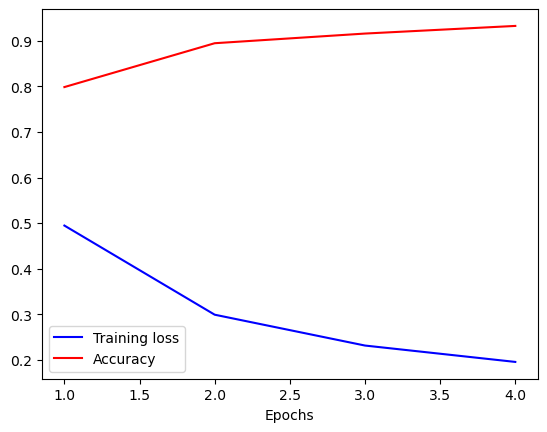

In [9]:
# Gráfica del resultado de la función de pérdida en los datos de entrenamiento y validación del entrenamiento
import matplotlib.pyplot as plt

history_dict = history.history

# La clave 'loss' devuelve una lista con los valores de la función de pérdida con los datos de apredizaje para cada epoch
loss_values = history_dict['loss']
acc = history_dict['accuracy']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, color='blue', label='Training loss')
plt.plot(epochs, acc, color='red', label='Accuracy')
plt.xlabel('Epochs')

plt.legend()
plt.show()

In [15]:
# Evaluo la exactitud (accuracy) del modelo con los datos de Prueba
results = model.evaluate(x_test, y_test)
print(f"Accuracy: {results[1]*100}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8841 - loss: 0.2868
Accuracy: 88.40799927711487%


In [14]:
# Calcular las predicción con los datos de prueba
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.15654536],
       [0.9999132 ],
       [0.81772596],
       ...,
       [0.09171987],
       [0.076979  ],
       [0.55866617]], dtype=float32)